*This is an edit of the tutorial on Data Visualization by Philipp Arndt applied to a region with fast ice and ice bergs close to Antarctica*

# Interactive Visualizion with Open Altimetry & Google Earth Engine

## Learning Objectives
- Load ICESat-2 data using the OpenAltimetry API. 
- Query Google Earth Engine for geospatial raster data and display it along with ICESat-2 ground tracks on an interactive map.
- Better understand what you are looking at in ATL03 features without downloading a bunch of files.

## Computing environment

We'll be using the following Python libraries in this notebook:

In [1]:
%matplotlib widget
import os
import ee
import geemap
import requests
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from datetime import timedelta
import rasterio as rio
from rasterio import plot
from rasterio import warp

    
The import below is a class that I wrote myself. It helps us read and store data from the OpenAltimetry API.  
If you are interested in how this works, you can find the code in `utils/oa.py`.

In [2]:
from utils.oa import dataCollector

## Google Earth Engine Authentication and Initialization
GEE requires you to authenticate your access, so if `ee.Initialize()` does not work you first need to run `ee.Authenticate()`. This gives you a link at which you can use your google account that is associated with GEE to get an authorization code. Copy the authorization code into the input field and hit *enter* to complete authentication. 

In [3]:
try:
    ee.Initialize()
except: 
    ee.Authenticate()
    ee.Initialize()

### Getting the OpenAltimetry info into python
All we need to do is to paste the API URL that we copied from the webpage into a string. 
We also need to specify which beam we would like to look at. The **GT2R** ground track looks funky, so let's look at that one!

In [4]:
def plot_from_oa_url(url,gtx,title='ICESat-2 Data'):
    mydata = dataCollector(oaurl=url,beam=gtx)
    mydata.requestData()
    myplot = mydata.plotData(title=title)
    return (myplot, mydata)

## Exercise 1 
**Find some data from openaltimetry that you would like to read into python, and plot it here.**

Look for small-scale features, where ATL03 photon cloud may give us some information that we would not get from ATL08 or ATL06 (Say a few hundred meters to 20 kilometers along-track. *Hint: OpenAltimetry has a scale bar.*)

If you don't know where to start with OpenAltimetry, you can look at any of these annotations below:
- Like mountains? Look at gt2l [here](http://openaltimetry.org/data/icesat2/?annoId=260&shareKey=6bcd62fe2f581f61c4a1b4b5a4f07de5).
- Like the ocean? Look at gt1r [here](http://openaltimetry.org/data/icesat2/?annoId=505&shareKey=4345379a3318b8c055d026723ca60162).
- Like the previous example but don't wanna go to Antarctica? Look at gt3l [here](http://openaltimetry.org/data/icesat2/?annoId=260&shareKey=6bcd62fe2f581f61c4a1b4b5a4f07de5).
- Curious about more ice shelf suff? Look at gt3r [here](http://openaltimetry.org/data/icesat2/?annoId=207&shareKey=e90e9fb891a716064f5cc8b0e13f750a).
- Can you tell what's going on in gt3r [here](http://openaltimetry.org/data/icesat2/?annoId=504&shareKey=aae14eeca098358c6f9e686ca659a93e)? 

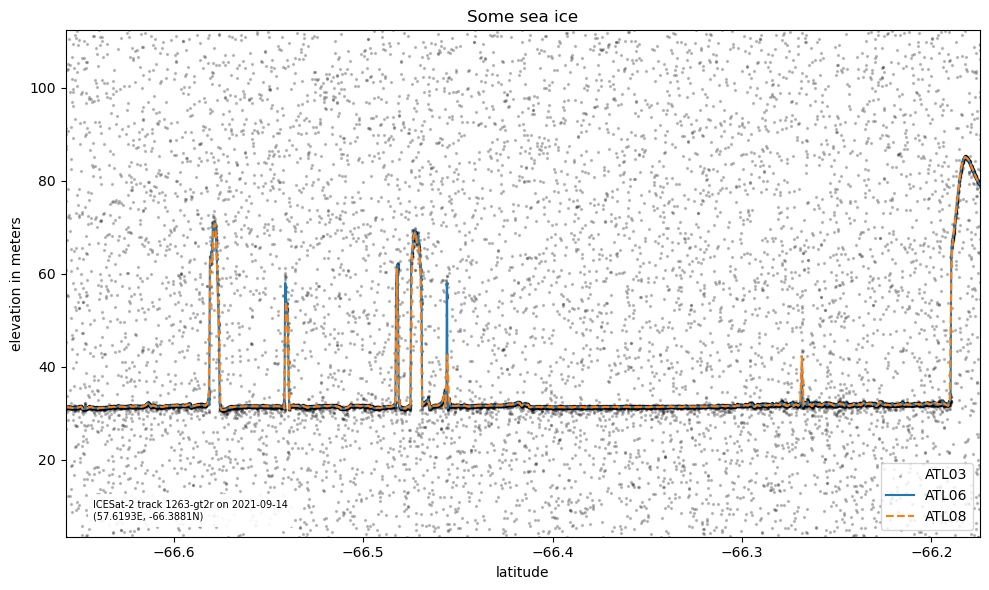

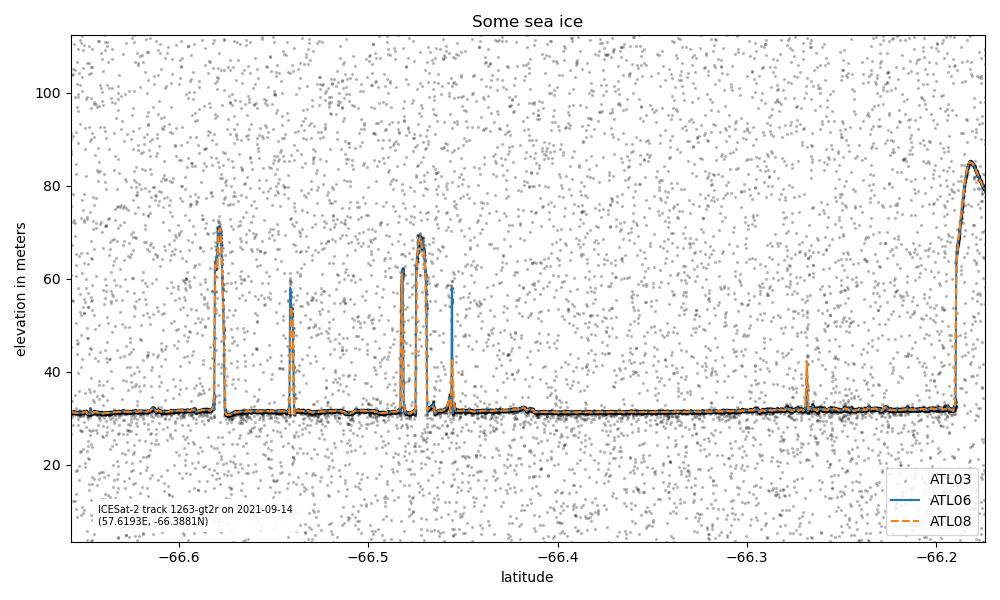

In [9]:
##### YOUR CODE GOES HERE
url = 'http://openaltimetry.org/data/api/icesat2/atl08?date=2021-09-14&minx=57.37896694168901&miny=-66.65730606386634&maxx=57.85961879715776&maxy=-66.11897598574134&trackId=1263&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&outputFormat=json'
#url = 'http://openaltimetry.org/data/api/icesat2/atl08?date=2021-09-14&minx=65.82731215191643&miny=-67.66562582997436&maxx=65.96944777203362&maxy=-67.46237875966186&trackId=1270&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&outputFormat=json'
#url = 'http://openaltimetry.org/data/api/icesat2/atl08?date=2021-12-19&minx=-52.22669081917024&miny=68.0623401105595&maxx=-51.20496230354524&maxy=70.6111682355595&trackId=1352&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&outputFormat=json'
#url =  'http://openaltimetry.org/data/api/icesat2/atl08?date=2021-12-13&minx=-133.1331311500303&miny=71.40947396407915&maxx=-133.00610173108498&maxy=71.7143445695479&trackId=1256&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&outputFormat=json'
#url = 'http://openaltimetry.org/data/api/icesat2/atl06?date=2021-12-13&minx=-16.730451244065822&miny=64.4749499129575&maxx=-16.466779369065822&maxy=64.7166491317075&trackId=1259&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&outputFormat=json'
gtx = 'gt2r'
myplot, mydata = plot_from_oa_url(url=url, gtx=gtx, title='Some sea ice')
#myplot.savefig('geemap_tutorial_exercise1.jpg', dpi=300)
myplot

## Exercise 2
**Plot your data from before with a suitable satellite image.**

Use the OpenAltimetry API URL that you already pasted in Exercise 1 for this. Edit the code below and paste it here again.

In [6]:
##### YOUR CODE GOES HERE
url = 'http://openaltimetry.org/data/api/icesat2/atl08?date=2021-09-14&minx=57.37896694168901&miny=-66.65730606386634&maxx=57.85961879715776&maxy=-66.11897598574134&trackId=1263&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&outputFormat=json'
#url = 'http://openaltimetry.org/data/api/icesat2/atl08?date=2021-09-14&minx=65.82731215191643&miny=-67.66562582997436&maxx=65.96944777203362&maxy=-67.46237875966186&trackId=1270&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&outputFormat=json'
gtx = 'gt2r'
yourData = dataCollector(oaurl=url, beam=gtx)
yourData.makeGEEmap()

Data has not yet been requested from OpenAltimetry yet. Doing this now.
---> requesting ATL03 data... Done.
---> requesting ATL06 data... Done.
---> requesting ATL08 data... Done.
The ground track is 54016 meters long.
Search for imagery from 2021-08-20 to 2021-10-09.
--> Number of scenes found within +/- 25 days of ICESat-2 overpass: 22
----> This is too many. Narrowing it down...
Search for imagery from 2021-08-28 to 2021-10-01.
--> Number of scenes found within +/- 17 days of ICESat-2 overpass: 18
00: 2021-08-29 ( 16 days before ICESat-2 overpass): LANDSAT/LC08/C01/T2/LC08_140106_20210829
01: 2021-08-29 ( 16 days before ICESat-2 overpass): LANDSAT/LC08/C01/T2/LC08_140107_20210829
02: 2021-08-31 ( 14 days before ICESat-2 overpass): LANDSAT/LC08/C01/T2/LC08_138107_20210831
03: 2021-09-03 ( 11 days before ICESat-2 overpass): COPERNICUS/S2_SR/20210903T050729_20210903T050727_T40DEM
04: 2021-09-05 (  9 days before ICESat-2 overpass): LANDSAT/LC08/C01/T2/LC08_141106_20210905
05: 2021-09-06

Map(center=[-66.41559881912002, 57.59139062277737], controls=(WidgetControl(options=['position', 'transparent_…

In [7]:
##### MORE OF YOUR CODE GOES HERE
#scene_id='COPERNICUS/S2_SR/20210916T051709_20210916T051711_T40DEM'
#fig = yourData.plotDataAndMap(scene_id, title='sea ice and ice bergs whoo')
#fig.savefig('geemap_tutorial_exercise2.jpg', dpi=300) 